In [2]:
#import libraries 
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

****Loading Dataset****

In [5]:
dataset=pd.read_csv('/content/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Exploratory Data Analysis¶


1)Using Manual Methods 

In [6]:
dataset.shape

(200, 5)

In [7]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
dataset.isnull().values.any()

False

Find Correlation among the variables

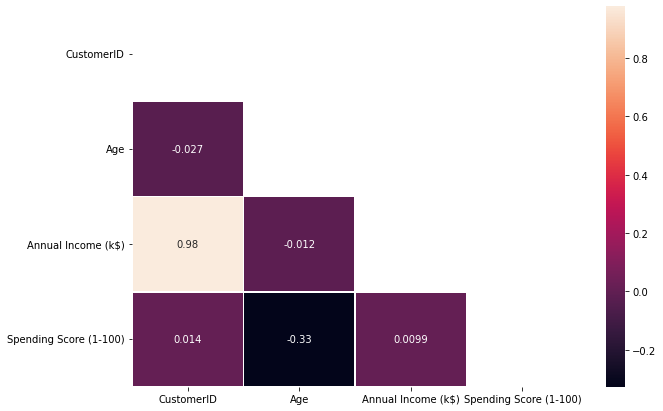

In [10]:
plt.figure(figsize=(10,7))
matrix=np.triu(dataset.corr())
sns.heatmap(dataset.corr(),annot=True,linewidths=0.8,mask=matrix,cmap='rocket')

Plotting Distribution for each Column in datasets

In [11]:
def distributionPlot(columnName):
  if not columnName=='Gender' :
    plt.figure()
    sns.displot(dataset[columnName],color='lightcoral',rug=True);

<Figure size 432x288 with 0 Axes>

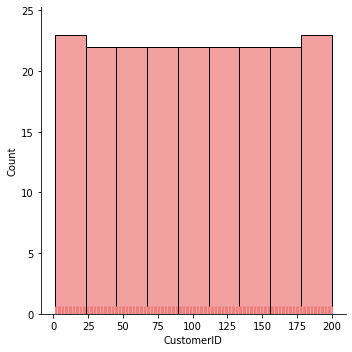

<Figure size 432x288 with 0 Axes>

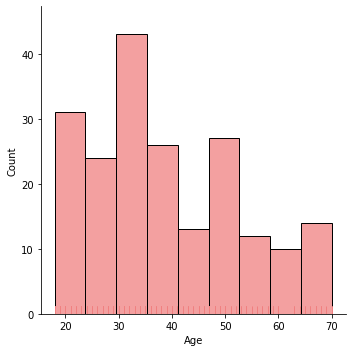

<Figure size 432x288 with 0 Axes>

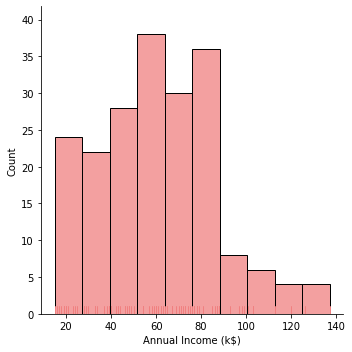

<Figure size 432x288 with 0 Axes>

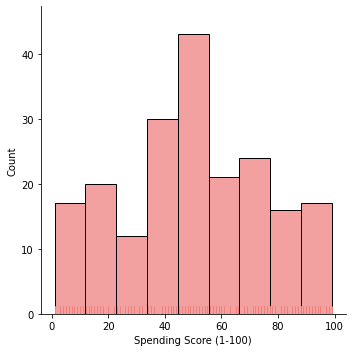

In [12]:
for column in dataset.columns :
  distributionPlot(column)

####Distribution of Males and Females in dataset


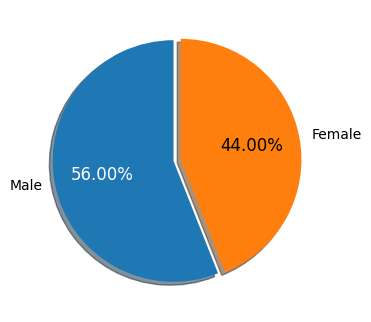

In [17]:
values=dataset['Gender'].value_counts()
labels=['Male','Female']

fig ,ax = plt.subplots(figsize=(4,4),dpi=100)
explode=(0,0.06)

patches,texts,autotexts=ax.pie(values,labels=labels,autopct='%1.2f%%', shadow=True,
                                   startangle=90, explode=explode)

plt.setp(texts,color='black')
plt.setp(autotexts,size=12,color='white')
autotexts[1].set_color('black')
plt.show()

In [21]:
x=dataset.iloc[:,[3,4]].values

In [23]:
#print(x)

Function to find the optimal number of clusters using elbow method

> Indented block



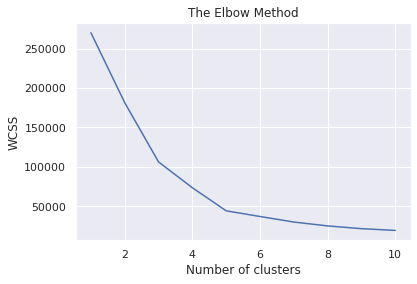

In [34]:
#find the optimal number of clusters using elbow method
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


  """Plots a Elbow Chart on the data provided"""
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

In [43]:
#Training the k-means clustering model 

kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

#return a label for each data point based on their cluster 
y=kmeans.fit_predict(x)

print(y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


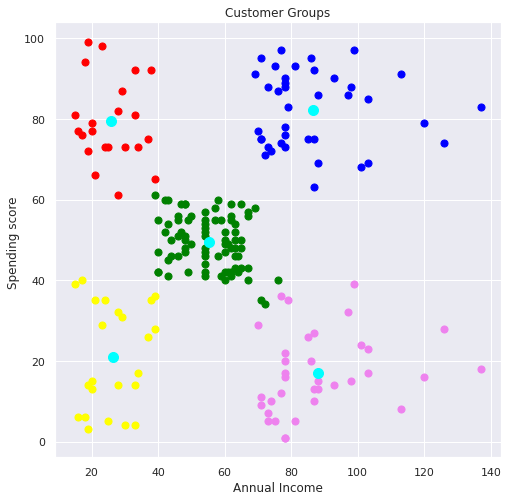

In [45]:
 #ploting all clusters and their centers 

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='cluster 1 ')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='blue',label='cluster 3 ')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='yellow',label='cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='violet',label='cluster 5 ')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')


plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending score ')

plt.show()